## Importing Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [172]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data

In [173]:
df = pd.read_csv('data.csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [174]:
print(f"Number of Documents: {df.shape[0]}")

Number of Documents: 5842


## Document's Text length Analysis and Distribution

In [175]:
df['text_length'] = df['Sentence'].apply(lambda x: len(x))
df

,Sentence,Sentiment,text_length
0,The GeoSolutions technology will leverage Bene...,positive,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55
2,"For the last quarter of 2010 , Componenta 's n...",positive,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107
5838,Nordic Walking was first used as a summer trai...,neutral,83
5839,"According shipping company Viking Line , the E...",neutral,99
5840,"In the building and home improvement trade , s...",neutral,88


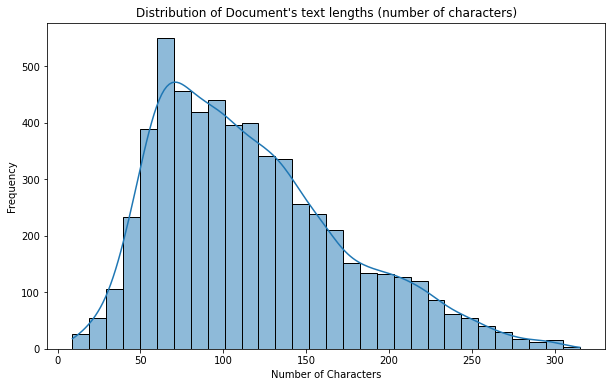

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title("Distribution of Document's text lengths (number of characters)")
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

## Class Distribution

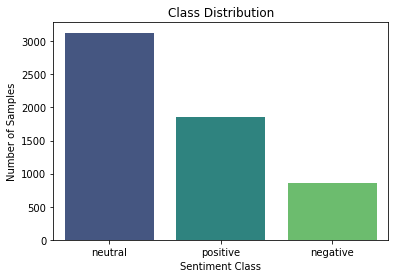

Class distribution:
 neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


In [178]:
class_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.show()

print('Class distribution:\n', class_counts)

## Cleaning text: removing special characters, stopwords and applying Lemmatization

In [179]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\W+', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [180]:
df['cleaned_text'] = df['Sentence'].apply(clean_text)
df

,Sentence,Sentiment,text_length,cleaned_text
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low 1 50 2 50 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter 2010 componenta net sale doubled ...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according finnish russian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sold remaining 22 4 percen...
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107,rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,neutral,83,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",neutral,99,according shipping company viking line eu deci...
5840,"In the building and home improvement trade , s...",neutral,88,building home improvement trade sale decreased...


## Word Frequency Analysis and Most Common words

In [184]:
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(30)
common_words

[('eur', 1286),
 ('company', 917),
 ('mn', 729),
 ('sale', 609),
 ('1', 606),
 ('profit', 585),
 ('finnish', 539),
 ('year', 528),
 ('share', 521),
 ('said', 516),
 ('net', 500),
 ('million', 493),
 ('2', 470),
 ('3', 439),
 ('5', 425),
 ('4', 372),
 ('operating', 371),
 ('0', 362),
 ('2009', 358),
 ('mln', 351),
 ('2008', 350),
 ('quarter', 348),
 ('finland', 339),
 ('period', 338),
 ('group', 336),
 ('6', 326),
 ('market', 316),
 ('2007', 306),
 ('co', 294),
 ('7', 292)]

In [185]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

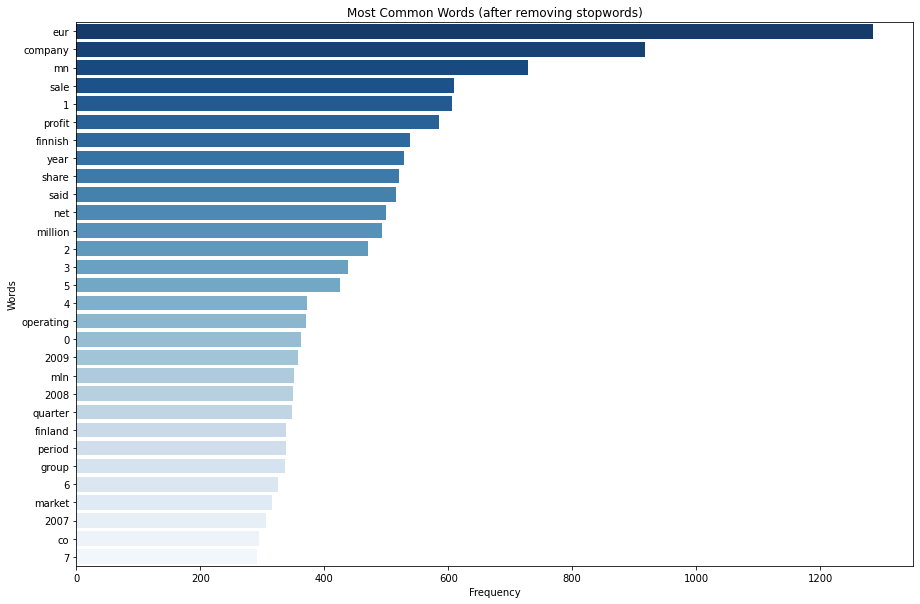

Top 10 most common words:


,Word,Frequency
0,eur,1286
1,company,917
2,mn,729
3,sale,609
4,1,606
5,profit,585
6,finnish,539
7,year,528
8,share,521
9,said,516


In [186]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_r')
plt.title('Most Common Words (after removing stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

print("Top 10 most common words:")
common_words_df[:15]

## Word Length and Document Length analysis after text cleaning

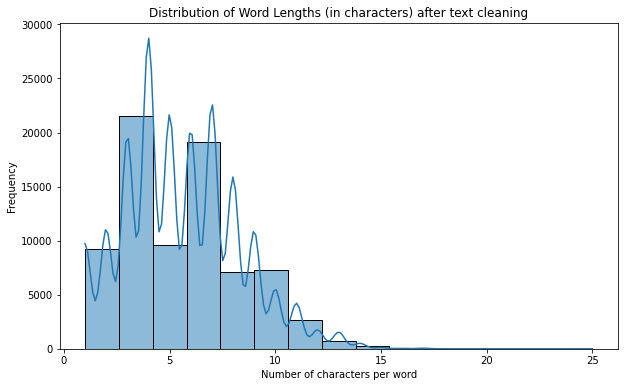

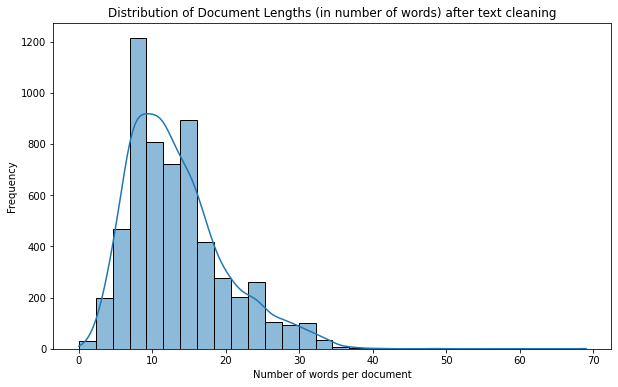

Average word length: 5.58 characters
Average document length: 13.29 words


In [187]:
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

df['word_lengths'] = df['tokenized_text'].apply(lambda x: [len(word) for word in x])

all_word_lengths = [length for sublist in df['word_lengths'] for length in sublist]

plt.figure(figsize=(10, 6))
sns.histplot(all_word_lengths, bins=15, kde=True)
plt.title('Distribution of Word Lengths (in characters) after text cleaning')
plt.xlabel('Number of characters per word')
plt.ylabel('Frequency')
plt.show()

df['document_length'] = df['tokenized_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['document_length'], bins=30, kde=True)
plt.title('Distribution of Document Lengths (in number of words) after text cleaning')
plt.xlabel('Number of words per document')
plt.ylabel('Frequency')
plt.show()

print(f'Average word length: {sum(all_word_lengths) / len(all_word_lengths):.2f} characters')
print(f'Average document length: {df["document_length"].mean():.2f} words')

## N-Gram Analysis

In [188]:
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

In [189]:
df['bigrams'] = df['cleaned_text'].apply(lambda x: get_ngrams(x, 2))

In [190]:
df

,Sentence,Sentiment,text_length,cleaned_text,tokenized_text,word_lengths,document_length,bigrams
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...,"[geosolutions, technology, leverage, benefon, ...","[12, 10, 8, 7, 3, 8, 9, 8, 5, 6, 10, 9, 8, 8, ...",21,"[(geosolutions, technology), (technology, leve..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low 1 50 2 50 bk real possibility,"[esi, low, 1, 50, 2, 50, bk, real, possibility]","[3, 3, 1, 2, 1, 2, 2, 4, 11]",9,"[(esi, low), (low, 1), (1, 50), (50, 2), (2, 5..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter 2010 componenta net sale doubled ...,"[last, quarter, 2010, componenta, net, sale, d...","[4, 7, 4, 10, 3, 4, 7, 7, 6, 6, 4, 7, 5, 4, 3,...",21,"[(last, quarter), (quarter, 2010), (2010, comp..."
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according finnish russian chamber commerce maj...,"[according, finnish, russian, chamber, commerc...","[9, 7, 7, 7, 8, 5, 12, 7, 7, 9, 6]",11,"[(according, finnish), (finnish, russian), (ru..."
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sold remaining 22 4 percen...,"[swedish, buyout, firm, sold, remaining, 22, 4...","[7, 6, 4, 4, 9, 2, 1, 7, 5, 6, 8, 5, 6, 7, 6, 7]",16,"[(swedish, buyout), (buyout, firm), (firm, sol..."
...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107,rising cost forced packaging producer huhtamak...,"[rising, cost, forced, packaging, producer, hu...","[6, 4, 6, 9, 8, 9, 3, 2, 3, 9, 13, 5]",12,"[(rising, cost), (cost, forced), (forced, pack..."
5838,Nordic Walking was first used as a summer trai...,neutral,83,nordic walking first used summer training meth...,"[nordic, walking, first, used, summer, trainin...","[6, 7, 5, 4, 6, 8, 6, 5, 7, 5]",10,"[(nordic, walking), (walking, first), (first, ..."
5839,"According shipping company Viking Line , the E...",neutral,99,according shipping company viking line eu deci...,"[according, shipping, company, viking, line, e...","[9, 8, 7, 6, 4, 2, 8, 11, 9, 6]",10,"[(according, shipping), (shipping, company), (..."
5840,"In the building and home improvement trade , s...",neutral,88,building home improvement trade sale decreased...,"[building, home, improvement, trade, sale, dec...","[8, 4, 11, 5, 4, 9, 2, 1, 3, 3, 1, 2]",12,"[(building, home), (home, improvement), (impro..."


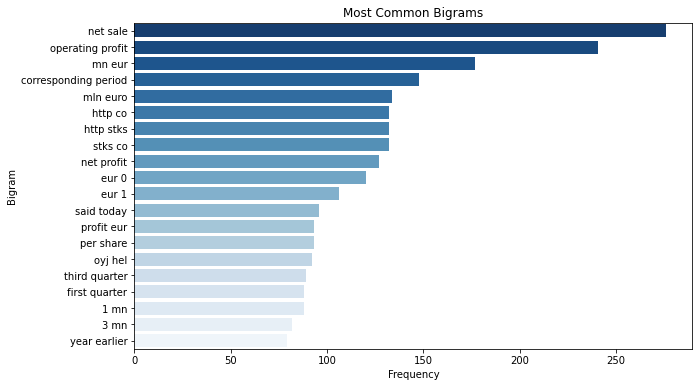

In [191]:
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)
bigram_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in bigram_df['Bigram']], data=bigram_df, palette='Blues_r')
plt.title('Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [192]:
df['trigrams'] = df['cleaned_text'].apply(lambda x: get_ngrams(x, 3))
df['trigrams']

0       [(geosolutions, technology, leverage), (techno...
1       [(esi, low, 1), (low, 1, 50), (1, 50, 2), (50,...
2       [(last, quarter, 2010), (quarter, 2010, compon...
3       [(according, finnish, russian), (finnish, russ...
4       [(swedish, buyout, firm), (buyout, firm, sold)...
                              ...                        
5837    [(rising, cost, forced), (cost, forced, packag...
5838    [(nordic, walking, first), (walking, first, us...
5839    [(according, shipping, company), (shipping, co...
5840    [(building, home, improvement), (home, improve...
5841    [(helsinki, afx, kci), (afx, kci, konecranes),...
Name: trigrams, Length: 5842, dtype: object

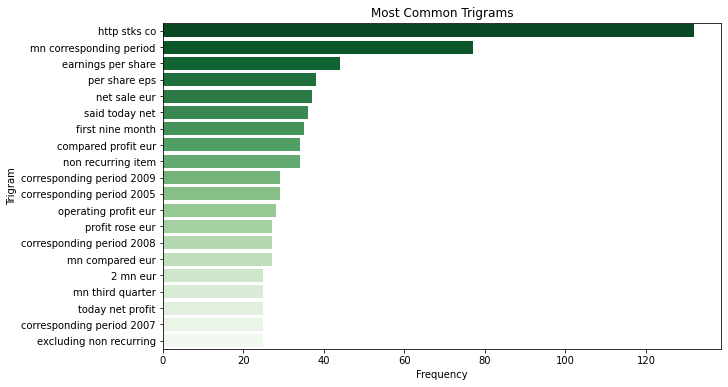

In [193]:
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]
trigram_freq = Counter(all_trigrams)
common_trigrams = trigram_freq.most_common(20)
trigram_df = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]} {x[2]}' for x in trigram_df['Trigram']], data=trigram_df, palette='Greens_r')
plt.title('Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [194]:
print("Top 5 Bigrams:")
bigram_df[:5]

Top 5 Bigrams:


,Bigram,Frequency
0,"(net, sale)",276
1,"(operating, profit)",241
2,"(mn, eur)",177
3,"(corresponding, period)",148
4,"(mln, euro)",134


In [195]:
print("Top 5 Trigrams:")
trigram_df[:5]

Top 5 Trigrams:


,Trigram,Frequency
0,"(http, stks, co)",132
1,"(mn, corresponding, period)",77
2,"(earnings, per, share)",44
3,"(per, share, eps)",38
4,"(net, sale, eur)",37


## TF-IDF Analysis

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 65079 stored elements and shape (5842, 10184)>

In [197]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '000063', ..., 'ñskyl', 'óeur', 'úo'], dtype=object)

In [198]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df

,00,000,000063,002,0025,003,0030,007,008,01,...,ñnge,ñnnen,ñnsi,ñrnits,ñrtsil,ñrvi,ñrvinen,ñskyl,óeur,úo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
avg_tfidf_scores = tfidf_df.mean(axis=0)
avg_tfidf_scores

00         0.001276
000        0.007255
000063     0.000053
002        0.000063
0025       0.000047
             ...   
ñrvi       0.000337
ñrvinen    0.000090
ñskyl      0.000047
óeur       0.000056
úo         0.000048
Length: 10184, dtype: float64

In [200]:
tfidf_scores_df = pd.DataFrame(avg_tfidf_scores, index=feature_names, columns=['Average_TFIDF'])
tfidf_scores_df = tfidf_scores_df.sort_values(by='Average_TFIDF', ascending=False)
tfidf_scores_df

,Average_TFIDF
eur,0.035411
mn,0.026038
company,0.020545
sale,0.017770
profit,0.017555
...,...
n96,0.000024
6110,0.000024
5700,0.000024
e62,0.000024


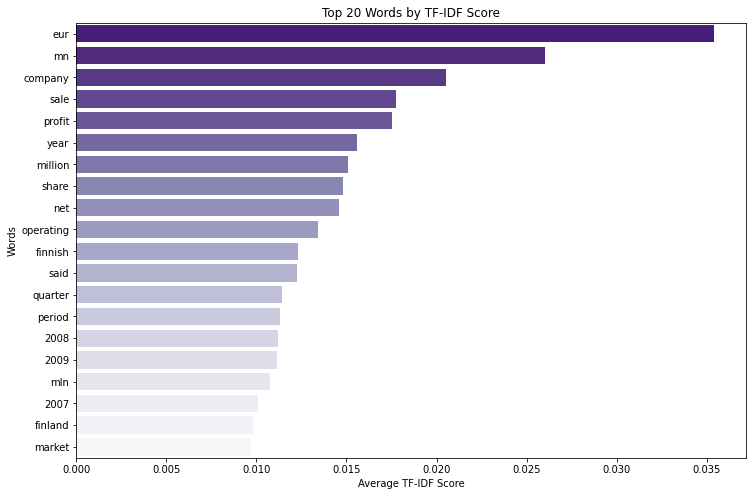

Top 10 Words by TF-IDF Score:
           Average_TFIDF
eur             0.035411
mn              0.026038
company         0.020545
sale            0.017770
profit          0.017555
year            0.015576
million         0.015110
share           0.014806
net             0.014584
operating       0.013411


In [201]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_TFIDF', y=tfidf_scores_df.head(20).index, data=tfidf_scores_df.head(20), palette='Purples_r')
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Words')
plt.show()

print("Top 10 Words by TF-IDF Score:")
print(tfidf_scores_df.head(10))

In [202]:
df.columns

Index(['Sentence', 'Sentiment', 'text_length', 'cleaned_text',
       'tokenized_text', 'word_lengths', 'document_length', 'bigrams',
       'trigrams'],
      dtype='object')

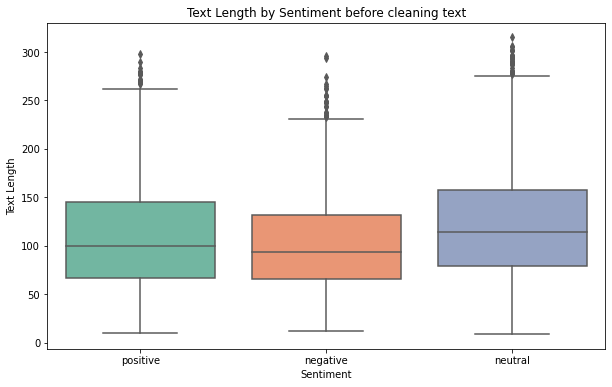

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='text_length', data=df, palette='Set2')
plt.title('Text Length by Sentiment before cleaning text')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

In [204]:
df['avg_word_length']=df['word_lengths'].apply(lambda x: np.mean(x))
df

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,Sentence,Sentiment,text_length,cleaned_text,tokenized_text,word_lengths,document_length,bigrams,trigrams,avg_word_length
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...,"[geosolutions, technology, leverage, benefon, ...","[12, 10, 8, 7, 3, 8, 9, 8, 5, 6, 10, 9, 8, 8, ...",21,"[(geosolutions, technology), (technology, leve...","[(geosolutions, technology, leverage), (techno...",7.714286
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi low 1 50 2 50 bk real possibility,"[esi, low, 1, 50, 2, 50, bk, real, possibility]","[3, 3, 1, 2, 1, 2, 2, 4, 11]",9,"[(esi, low), (low, 1), (1, 50), (50, 2), (2, 5...","[(esi, low, 1), (low, 1, 50), (1, 50, 2), (50,...",3.222222
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter 2010 componenta net sale doubled ...,"[last, quarter, 2010, componenta, net, sale, d...","[4, 7, 4, 10, 3, 4, 7, 7, 6, 6, 4, 7, 5, 4, 3,...",21,"[(last, quarter), (quarter, 2010), (2010, comp...","[(last, quarter, 2010), (quarter, 2010, compon...",5.000000
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according finnish russian chamber commerce maj...,"[according, finnish, russian, chamber, commerc...","[9, 7, 7, 7, 8, 5, 12, 7, 7, 9, 6]",11,"[(according, finnish), (finnish, russian), (ru...","[(according, finnish, russian), (finnish, russ...",7.636364
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedish buyout firm sold remaining 22 4 percen...,"[swedish, buyout, firm, sold, remaining, 22, 4...","[7, 6, 4, 4, 9, 2, 1, 7, 5, 6, 8, 5, 6, 7, 6, 7]",16,"[(swedish, buyout), (buyout, firm), (firm, sol...","[(swedish, buyout, firm), (buyout, firm, sold)...",5.625000
...,...,...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107,rising cost forced packaging producer huhtamak...,"[rising, cost, forced, packaging, producer, hu...","[6, 4, 6, 9, 8, 9, 3, 2, 3, 9, 13, 5]",12,"[(rising, cost), (cost, forced), (forced, pack...","[(rising, cost, forced), (cost, forced, packag...",6.416667
5838,Nordic Walking was first used as a summer trai...,neutral,83,nordic walking first used summer training meth...,"[nordic, walking, first, used, summer, trainin...","[6, 7, 5, 4, 6, 8, 6, 5, 7, 5]",10,"[(nordic, walking), (walking, first), (first, ...","[(nordic, walking, first), (walking, first, us...",5.900000
5839,"According shipping company Viking Line , the E...",neutral,99,according shipping company viking line eu deci...,"[according, shipping, company, viking, line, e...","[9, 8, 7, 6, 4, 2, 8, 11, 9, 6]",10,"[(according, shipping), (shipping, company), (...","[(according, shipping, company), (shipping, co...",7.000000
5840,"In the building and home improvement trade , s...",neutral,88,building home improvement trade sale decreased...,"[building, home, improvement, trade, sale, dec...","[8, 4, 11, 5, 4, 9, 2, 1, 3, 3, 1, 2]",12,"[(building, home), (home, improvement), (impro...","[(building, home, improvement), (home, improve...",4.416667


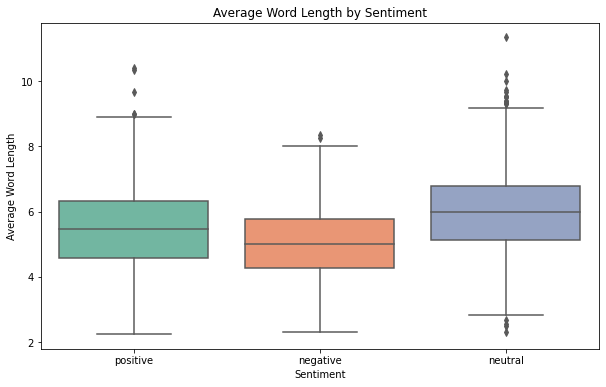

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='avg_word_length', data=df, palette='Set2')
plt.title('Average Word Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Length')
plt.show()

## Sentiment Vs N-gram analysis

In [206]:
def get_most_common_ngrams(sentiment, n, df):
    all_ngrams = [ngram for sublist in df[df['Sentiment']==sentiment][n] for ngram in sublist]
    ngram_freq = Counter(all_ngrams)
    common_ngrams = ngram_freq.most_common(20)
    ngram_df = pd.DataFrame(common_ngrams, columns=[n, 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y=[f'{x[0]} {x[1]}' for x in ngram_df[n]], data=ngram_df, palette='Blues_r')
    plt.title(f'Most Common {n} for {sentiment} sentiment')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}')
    plt.show()

In [207]:
df['Sentiment'].unique()[0]

'positive'

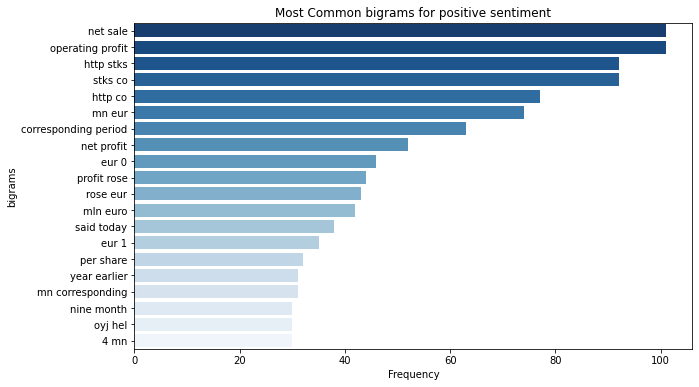

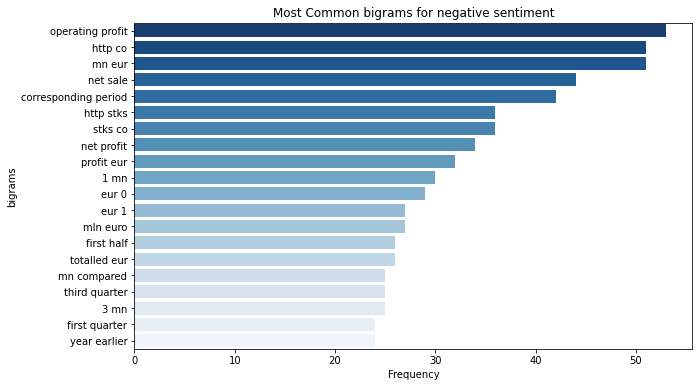

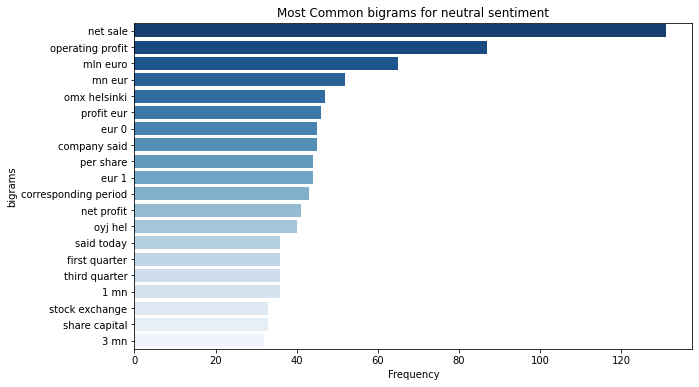

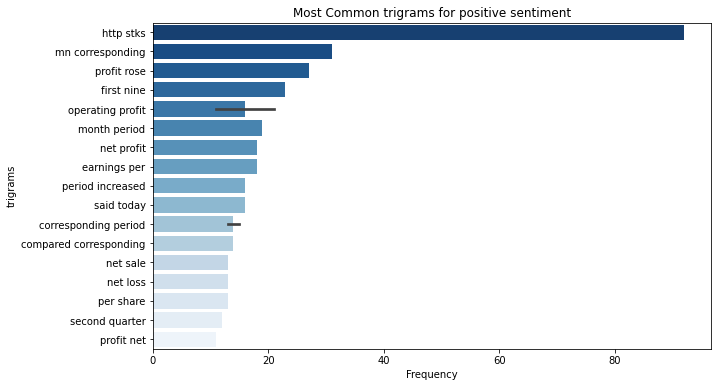

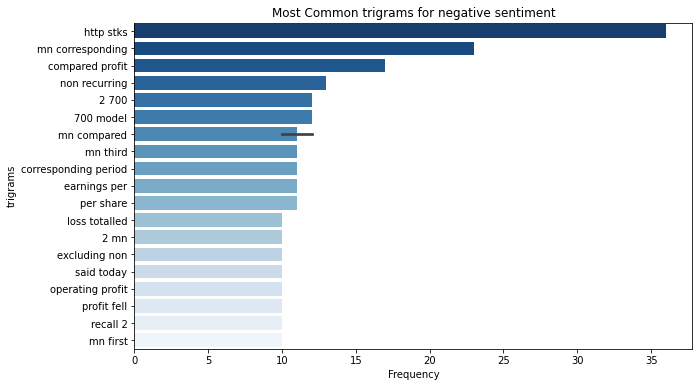

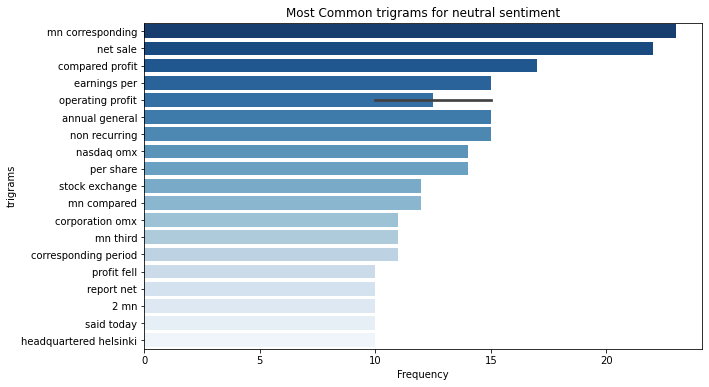

In [208]:
ngrams = ['bigrams','trigrams']
for n in ngrams:
    for sentiment in df['Sentiment'].unique():
        get_most_common_ngrams(sentiment,n,df)

In [225]:
df.to_csv('Preprocessed_Data.csv',index=False)